In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [28]:
data = pd.read_csv("Datasets/loan_prediction_data.csv")

In [29]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0.0,0.0,0.000000,1.0,0.0,0.070489,0.000000,0.198860,0.74359,1.0,1.0,1.0
1,LP001003,0.0,1.0,0.333333,1.0,0.0,0.054830,0.036192,0.172214,0.74359,1.0,0.0,0.0
2,LP001005,0.0,1.0,0.000000,1.0,1.0,0.035250,0.000000,0.082489,0.74359,1.0,1.0,1.0
3,LP001006,0.0,1.0,0.000000,0.0,0.0,0.030093,0.056592,0.160637,0.74359,1.0,1.0,1.0
4,LP001008,0.0,0.0,0.000000,1.0,0.0,0.072356,0.000000,0.191027,0.74359,1.0,1.0,1.0


In [6]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [7]:
data.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.182410,0.653094,0.248100,0.781759,0.133550,0.064978,0.038910,0.198860,0.706005,0.855049,0.518730,0.687296
std,0.386497,0.476373,0.336541,0.413389,0.340446,0.075560,0.070229,0.121617,0.137668,0.352339,0.393741,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,0.033735,0.000000,0.132055,0.743590,1.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,1.000000,0.000000,0.045300,0.028524,0.173661,0.743590,1.000000,0.500000,1.000000
75%,0.000000,1.000000,0.333333,1.000000,0.000000,0.069821,0.055134,0.225398,0.743590,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
data.shape

(614, 13)

In [9]:
train_X,test_X,train_y,test_y = train_test_split(data.drop(['Loan_Status', 'Loan_ID'],axis=1),data['Loan_Status'],test_size=0.2,random_state=0)
train_X.shape, test_X.shape

((491, 11), (123, 11))

Defining the Architecture of Model

In [11]:
import tensorflow as tf
import keras

print(keras.__version__)
print(tf.__version__)

3.10.0
2.19.0


In [12]:
#importing the sequential and layers
from keras.models import Sequential
from keras.layers import Dense, InputLayer

In [13]:
number_of_output_neurons = 1
number_of_hidden_layers = 2
number_of_hidden_layer_1 = 10
number_of_hidden_layer_2 = 5

In [15]:
input_neurons = train_X.shape[1]

In [16]:
#defining the architecture

model = Sequential()
model.add(InputLayer(input_shape=(input_neurons,)))
model.add(Dense(units=number_of_hidden_layer_1,activation='relu'))
model.add(Dense(units=number_of_hidden_layer_2,activation='relu'))
model.add(Dense(units=number_of_output_neurons,activation='sigmoid'))

c:\AFLAH projects\Simple_Projects\ENV\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [17]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │           120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 181 (724.00 B)

 Trainable params: 181 (724.00 B)

 Non-trainable params: 0 (0.00 B)

In [18]:
#number of parameters between input and first hidden layer

input_neurons * number_of_hidden_layer_1

110

In [19]:
number_of_hidden_layer_1 * number_of_hidden_layer_2+5

55

In [20]:
number_of_hidden_layer_2 * number_of_output_neurons+1

6

Compiling the model

In [21]:
model.compile(loss = "binary_crossentropy", optimizer="Adam", metrics=["accuracy"])

training the model

In [22]:
model_history = model.fit(train_X, train_y, epochs=50, validation_data=(test_X, test_y))

Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - accuracy: 0.4075 - loss: 0.7088 - val_accuracy: 0.5610 - val_loss: 0.6803
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.6531 - loss: 0.6639 - val_accuracy: 0.8211 - val_loss: 0.6391
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.7893 - loss: 0.6381 - val_accuracy: 0.7967 - val_loss: 0.6147
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.7439 - loss: 0.6255 - val_accuracy: 0.7724 - val_loss: 0.5955
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.7374 - loss: 0.6040 - val_accuracy: 0.7724 - val_loss: 0.5814
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7453 - loss: 0.5975 - val_accuracy: 0.7724 - val_loss: 0.5691
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7147 - loss: 0.6052 - val_accuracy: 0.7805 - val_loss: 0.5598
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7638 - loss: 0.5796 - val_accuracy: 0.7886 - v

In [23]:
predict = np.where(model.predict(test_X) > 0.5,1,0)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step


In [24]:
accuracy_score(test_y,predict)

0.8292682926829268

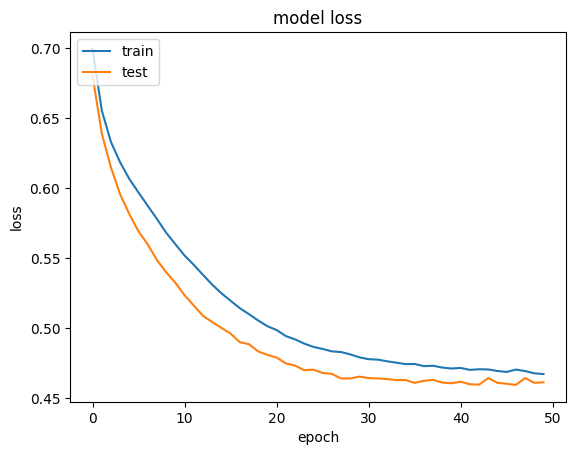

In [25]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

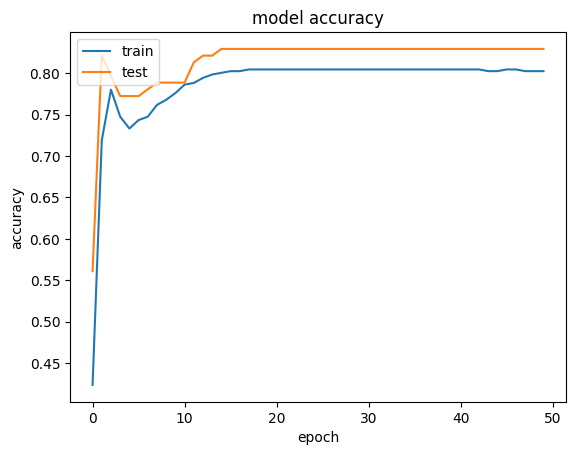

In [26]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')